In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# our desney_plus dataset as df
df = pd.read_csv('disney_plus_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
df.shape

(1368, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [6]:
#missing values
df.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
#Return a Series containing counts of unique values.
df.type.value_counts()

Movie      991
TV Show    377
Name: type, dtype: int64

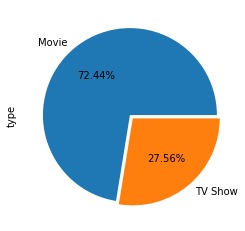

In [8]:
df.type.value_counts().plot(kind = 'pie', explode = [0, 0.05], autopct='%1.2f%%');

In [9]:
inline_rc = dict(mpl.rcParams)
#inline_rc

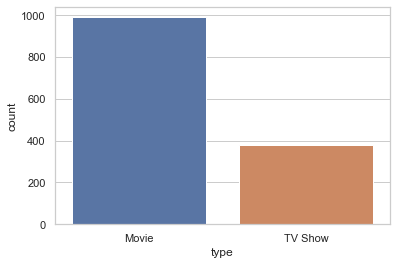

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'type', data = df);

In [11]:
# Restore the `.rcParams` from the original rc file loaded by Matplotlib.
mpl.rc_file_defaults()
mpl.rcParams.update(inline_rc)

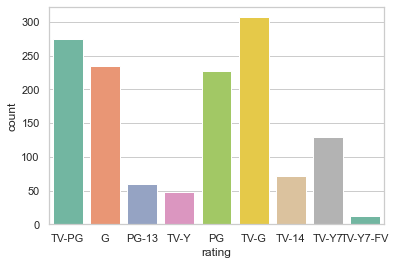

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'rating', data = df, palette = 'Set2');

## Release Year

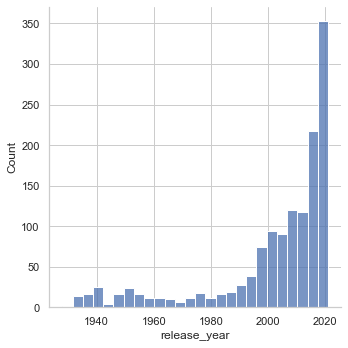

In [13]:
sns.displot(x = 'release_year', data = df, palette="hls");

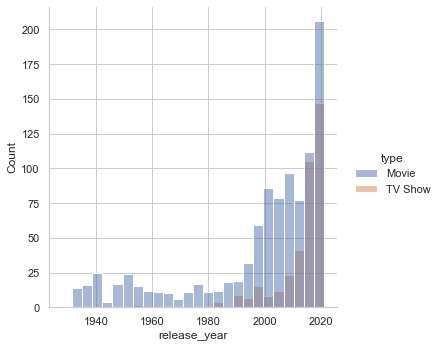

In [14]:
sns.displot(x = 'release_year', data = df, hue = 'type');

## Top 10 directors with most Movies/TV shows

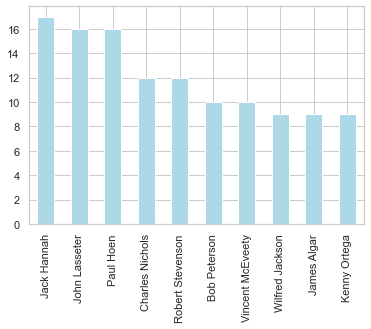

In [15]:
df.director.value_counts()[:10].plot(kind = 'bar', color = 'lightblue');

## Movies and Tv Shows ratings

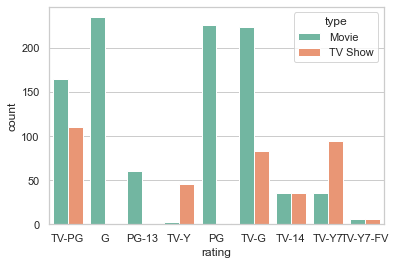

In [16]:
sns.countplot(x = 'rating', data = df, hue = 'type', palette = 'Set2');

## TV Show duration

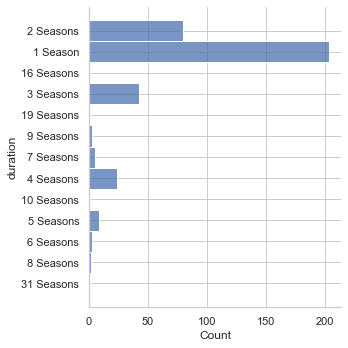

In [17]:
sns.displot(y = 'duration', data = df[df['type'] == 'TV Show']);

## Movie Rating

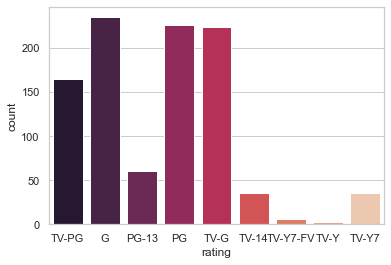

In [18]:
sns.countplot(x = 'rating', data = df[df['type'] == 'Movie'], palette = 'rocket');

## Top 10 directors with most Movies

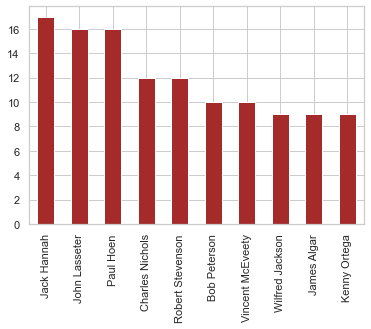

In [19]:
df[df['type'] == 'Movie'].director.value_counts()[:10].plot(kind = 'bar', color = 'brown');

## Oldest Movies

In [20]:
old = df[df['type'] == 'Movie'].sort_values('release_year')
old[['title', 'release_year']][:10]

,title,release_year
1146,Steamboat Willie,1928
1104,Santa's Workshop,1932
819,Flowers and Trees,1932
662,Babes in the Woods,1932
1345,Ye Olden Days,1933
1288,Three Little Pigs,1933
1243,The Pied Piper,1933
848,Grasshopper and the Ants,1934
1282,The Wise Little Hen,1934
1180,The Big Bad Wolf,1934


## Top 10 categories with most movies

In [21]:
df.listed_in.value_counts()[:10]

Animation, Comedy, Family                120
Action-Adventure, Animation, Comedy       75
Action-Adventure, Animation, Kids         45
Animals & Nature, Documentary, Family     40
Action-Adventure, Animation, Family       40
Animals & Nature, Docuseries, Family      38
Animals & Nature, Documentary             34
Action-Adventure, Comedy, Family          27
Animation, Family, Fantasy                26
Documentary                               24
Name: listed_in, dtype: int64

## Top 10 contries with most movies

In [22]:
df.country.value_counts()[:10]

United States                    976
United States, Canada             28
United Kingdom                    23
United States, United Kingdom     19
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, France              4
United States, Japan               4
Name: country, dtype: int64